In [96]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# Load the dataset
df = pd.read_excel('Energy_Efficiency_Dataset.xlsx')

In [98]:
# Display the first few rows of the dataset
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [99]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [100]:
# Statistical summary of the dataset
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [101]:
# Check for missing values in the dataset
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

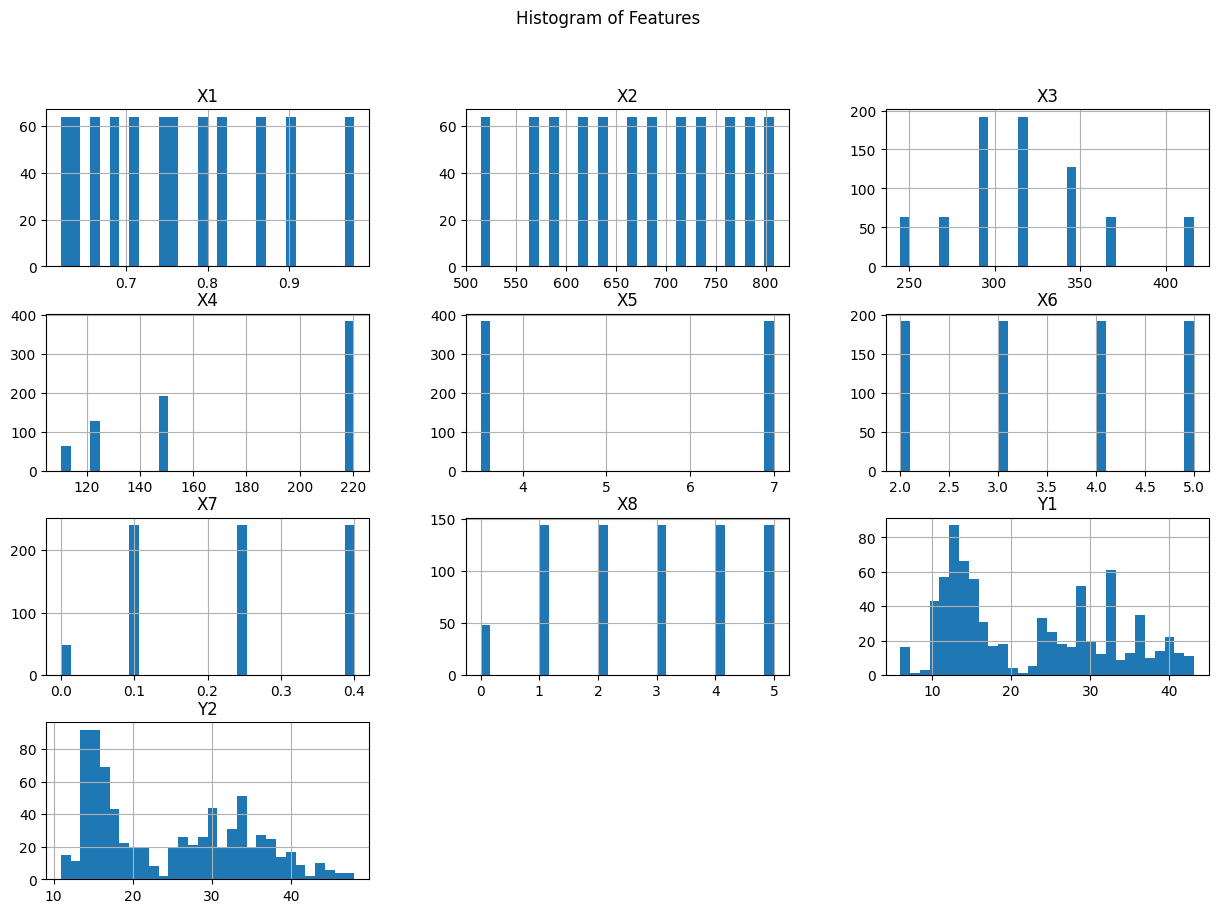

In [102]:
# Visualize the distribution of each feature
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Features')
plt.show()

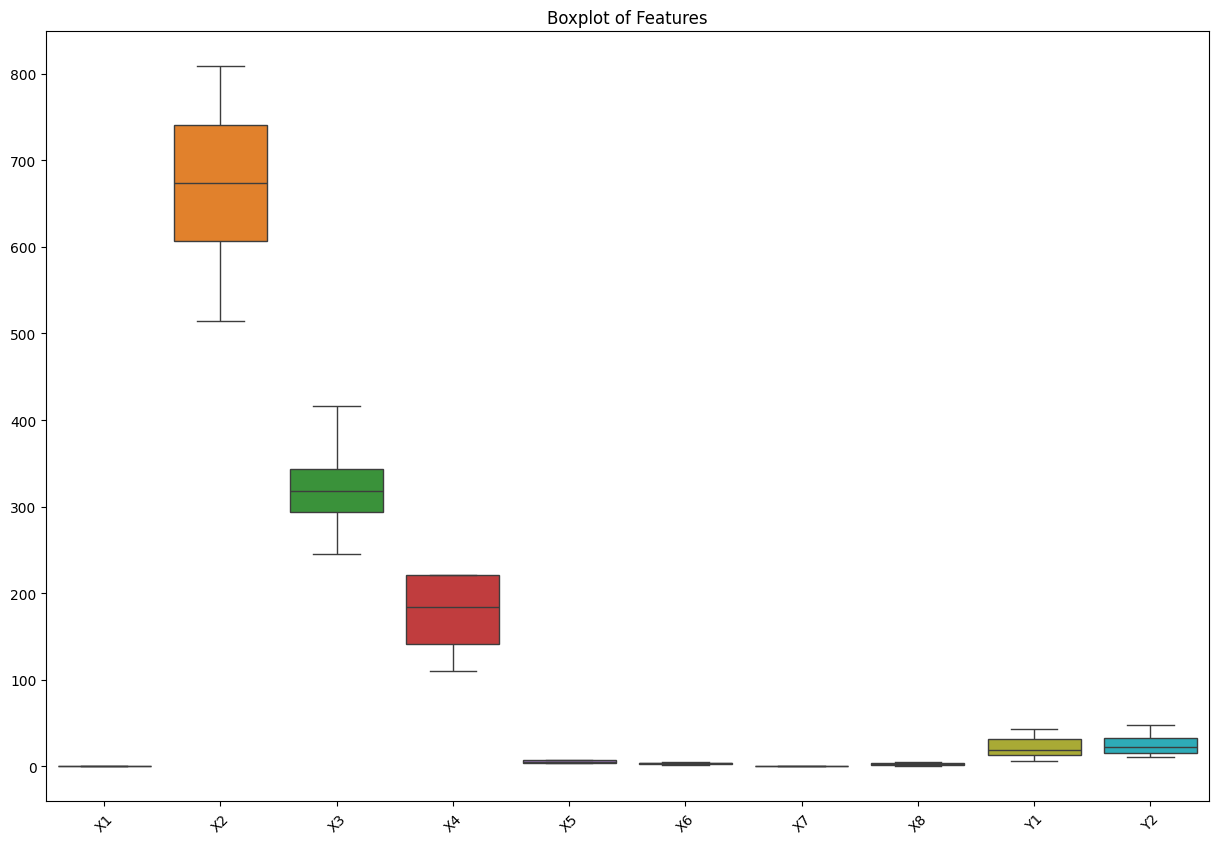

In [103]:
# Boxplot to identify outliers in the dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

In [104]:
# Split the data into features and target variables
X = df.drop(columns=['Y1', 'Y2'])
y1 = df['Y1']
y2 = df['Y2']

In [105]:
# Define custom scaler class
class my_scaler:
    def fit(self, X):
        """Compute the mean and standard deviation for each feature."""
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        """Scale the features using the computed mean and std."""
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        """Fit to data, then transform it."""
        self.fit(X)
        return self.transform(X)

In [106]:
# Scale the features and target variables
scaler = my_scaler()
X_scaled = scaler.fit_transform(X)
y1_scaled = scaler.fit_transform(y1.values.reshape(-1, 1)).flatten()
y2_scaled = scaler.fit_transform(y2.values.reshape(-1, 1)).flatten()

# Add intercept term to features
X_b = np.c_[np.ones(X_scaled.shape[0]), X_scaled]  # Add a column of ones

In [107]:
# Gradient Descent function with L2 regularization
def gradient_descent(X, y, alpha=0.01, iter=1000, lambda_reg=0.1):
    """Perform gradient descent to learn theta with L2 regularization."""
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_values = []

    for _ in range(iter):
        y_hat = X.dot(theta)  # Predicted values
        errors = y_hat - y
        
        # Update theta with regularization term (excluding the bias term)
        theta[1:] -= (alpha/m) * (X[:, 1:].T.dot(errors) + lambda_reg*theta[1:])
        theta[0] -= (alpha/m) * np.sum(errors)
        
        # Calculate regularized cost
        cost = (1 / (2 * m)) * (np.sum(errors ** 2) + lambda_reg * np.sum(theta[1:] ** 2))
        cost_values.append(cost)  # Store cost

    return theta, cost_values

In [108]:
# Train the models with regularization
lambda_reg = 0.00001
theta_y1, cost_y1 = gradient_descent(X_b, y1_scaled, alpha=0.01, iter=1000, lambda_reg=lambda_reg)
theta_y2, cost_y2 = gradient_descent(X_b, y2_scaled, alpha=0.01, iter=1000, lambda_reg=lambda_reg)

# Make predictions for Heating Load (y1) and Cooling Load (y2)
y1_predictions = X_b.dot(theta_y1)
y2_predictions = X_b.dot(theta_y2)

In [109]:
# Calculations
# Calculate MSE and R² for Heating Load (y1)
mse_y1 = mean_squared_error(y1_scaled, y1_predictions)
r2_y1 = r2_score(y1_scaled, y1_predictions)

# Calculate MSE and R² for Cooling Load (y2)
mse_y2 = mean_squared_error(y2_scaled, y2_predictions)
r2_y2 = r2_score(y2_scaled, y2_predictions)

# Model performance metrics
print(f"Heating Load (y1) - MSE: {mse_y1:.4f}, R²: {r2_y1:.4f}")
print(f"Cooling Load (y2) - MSE: {mse_y2:.4f}, R²: {r2_y2:.4f}")

Heating Load (y1) - MSE: 0.0965, R²: 0.9035
Cooling Load (y2) - MSE: 0.1290, R²: 0.8710


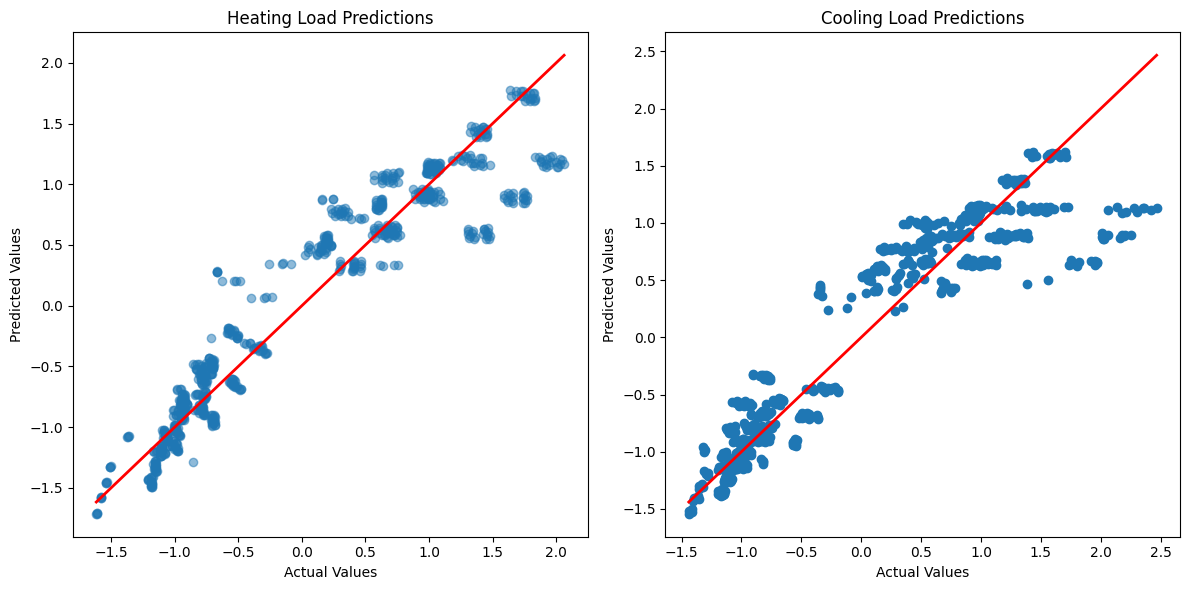

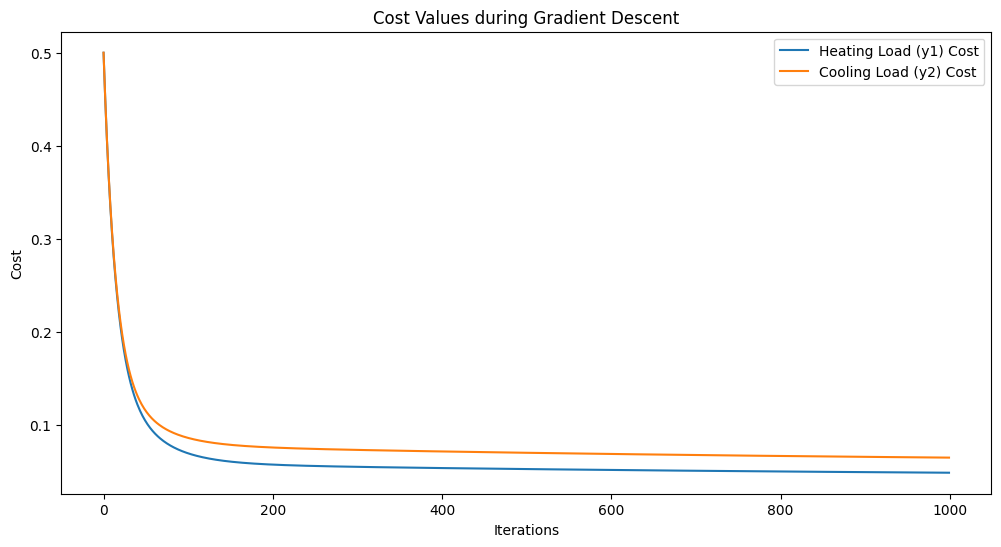

In [111]:
# -----Plots------
# Visualize predictions vs actual values for Heating Load
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y1_scaled, y1_predictions, alpha=0.5)
plt.plot([y1_scaled.min(), y1_scaled.max()], [y1_scaled.min(), y1_scaled.max()], color='red', lw=2)
plt.title('Heating Load Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Visualize predictions vs actual values for Cooling Load
plt.subplot(1, 2, 2)
plt.scatter(y2_scaled, y2_predictions)
plt.plot([y2_scaled.min(), y2_scaled.max()], [y2_scaled.min(), y2_scaled.max()], color='red', lw=2)
plt.title('Cooling Load Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Optional: Plot cost history to show convergence
plt.figure(figsize=(12, 6))
plt.plot(cost_y1, label='Heating Load (y1) Cost')
plt.plot(cost_y2, label='Cooling Load (y2) Cost')
plt.title('Cost Values during Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [ ]:
# Conclusion
# In this project, we implemented a custom linear regression model using gradient descent with L2 regularization.
# We evaluated the model's performance using Mean Squared Error (MSE) and R² scores and visualized the predictions.
# Future improvements could include experimenting with different datasets or regularization techniques.